# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import config
import os

In [2]:
# set figure details
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

# CAG counts

In [3]:
clusters = pd.read_csv(os.path.join(config.RAW_DIR, "clusters_allgenes_inputfilter.txt"), sep="\t", index_col=0, header=None)
clusters

,1
0,
CAG00001,UniRef90_A0A378A6L7
CAG00001,UniRef90_A0A2X1RLT4
CAG00001,UniRef90_A0A333FLJ3
CAG00001,UniRef90_V5ADF3
CAG00001,UniRef90_UPI000A3C0D9B
...,...
CAG27816,UniRef90_A0A148HQ34
CAG27817,UniRef90_UPI0002A368F9
CAG27817,UniRef90_A0A2X3M0Q2


In [4]:
counts = clusters.groupby(level=0).count()
counts

,1
0,
CAG00001,11642
CAG00002,4384
CAG00003,3993
CAG00004,3677
CAG00005,3259
...,...
CAG27814,2
CAG27815,2
CAG27816,2


In [5]:
(counts.iloc[:, 0] > 700).sum()

180

Text(0, 0.5, '\\# of genes in CAG (log10)')

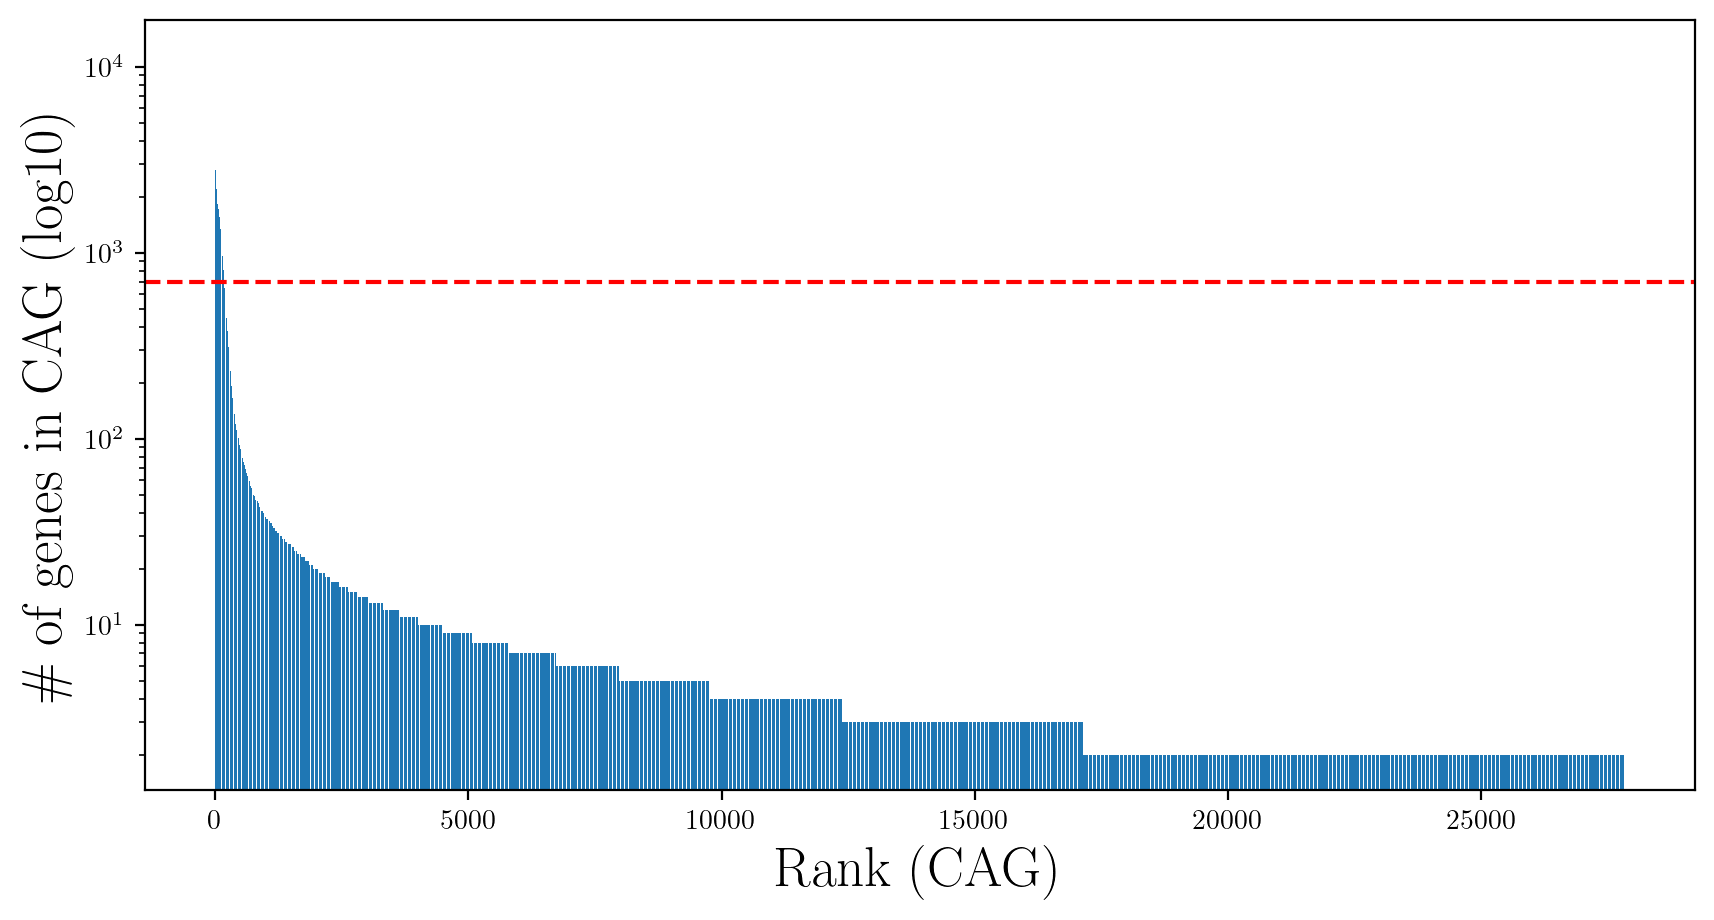

In [6]:
plt.figure(figsize=(10, 5), dpi=200)
num_cags = counts.shape[0]
plt.bar(range(num_cags), counts.values.flatten())
plt.yscale("log")
plt.axhline(y=700, color='r', linestyle='--')
plt.xlabel("Rank (CAG)", fontsize=20)
plt.ylabel("\# of genes in CAG (log10)", fontsize=20)

# profiles

In [7]:
metadata = pd.read_csv(os.path.join(config.CLEAN_DIR, "metadata.tsv"), sep="\t")
metadata

,Sample_ID,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,...,expo_cat1,expo_cat2,calc_age_mo,currentfeed_bf,currentfeed_f,currentfeed_o,Sequencing_Project,Filename,Extraction,depth
0,magic.0001,101,no,12/10/16,1430,0,regular,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.07,1.0,0.0,magic.0001,Knights_Project_046,magic.0001.S22.001.fa,MagAttract,1544781
1,magic.0004,101,no,12/15/16,NaN,1,regular,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.23,1.0,0.0,magic.0004,Knights_Project_046,magic.0004.S34.001.fa,MagAttract,1167038
2,magic.0006,104,yes,12/15/16,2335,0,regular,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0006,Knights_Project_076_Pool3,magic.0006.S145.001.fa,PowerSoil,1720636
3,magic.0007,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0007,Knights_Project_076_Pool3,magic.0007.S155.001.fa,PowerSoil,6825017
4,magic.0008,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0008,Knights_Project_055,X8.S125.001.fa,PowerSoil,2928044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3437,magic.6595,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,...,No antibiotics,Vaginal,24.11,NaN,NaN,magic.6595,Knights_Project_077_Pool3,magic.6595.S253.001.fa,PowerSoilPro,1562968
3438,magic.6597,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,...,No antibiotics,Vaginal,24.11,NaN,NaN,magic.6597,Knights_Project_077_Pool3,magic.6597.S265.001.fa,PowerSoilPro,2113880
3439,magic.6598,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,...,GBS antibiotics,C-section with labor,24.34,NaN,NaN,magic.6598,Knights_Project_077_Pool3,magic.6598.S277.001.fa,PowerSoilPro,1650388
3440,magic.6599,573,NaN,7/21/21,845,96,regular,NaN,NaN,NaN,...,Other antibiotics,C-section with labor,24.08,NaN,NaN,magic.6599,Knights_Project_077_Pool3,magic.6599.S288.001.fa,PowerSoilPro,1519641


In [8]:
CAG = pd.read_csv(os.path.join(config.RAW_DIR, "profiles_allgenes_inputfilter.txt"), sep="\t", index_col=0, header=None).iloc[:, :-1]
CAG.columns = metadata["Sample_ID"]
CAG

Sample_ID,magic.0001,magic.0004,magic.0006,magic.0007,magic.0008,magic.0010,magic.0011,magic.0012,magic.0013,magic.0014,...,magic.6590,magic.6591,magic.6592,magic.6593,magic.6594,magic.6595,magic.6597,magic.6598,magic.6599,magic.6600
0,,,,,,,,,,,,,,,,,,,,,
CAG00001,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
CAG00002,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
CAG00003,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,...,0.000013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
CAG00004,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,...,0.000010,0.000006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
CAG00005,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000071,0.000000,0.000024,0.000041,0.000015,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CAG27814,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
CAG27815,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,...,0.000000,0.000091,0.000000,0.000000,0.000000,0.000000,0.000021,0.000000,0.0,0.0
CAG27816,0.000000,0.000000,0.000000e+00,0.000146,0.000089,0.000000e+00,0.0,0.000238,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


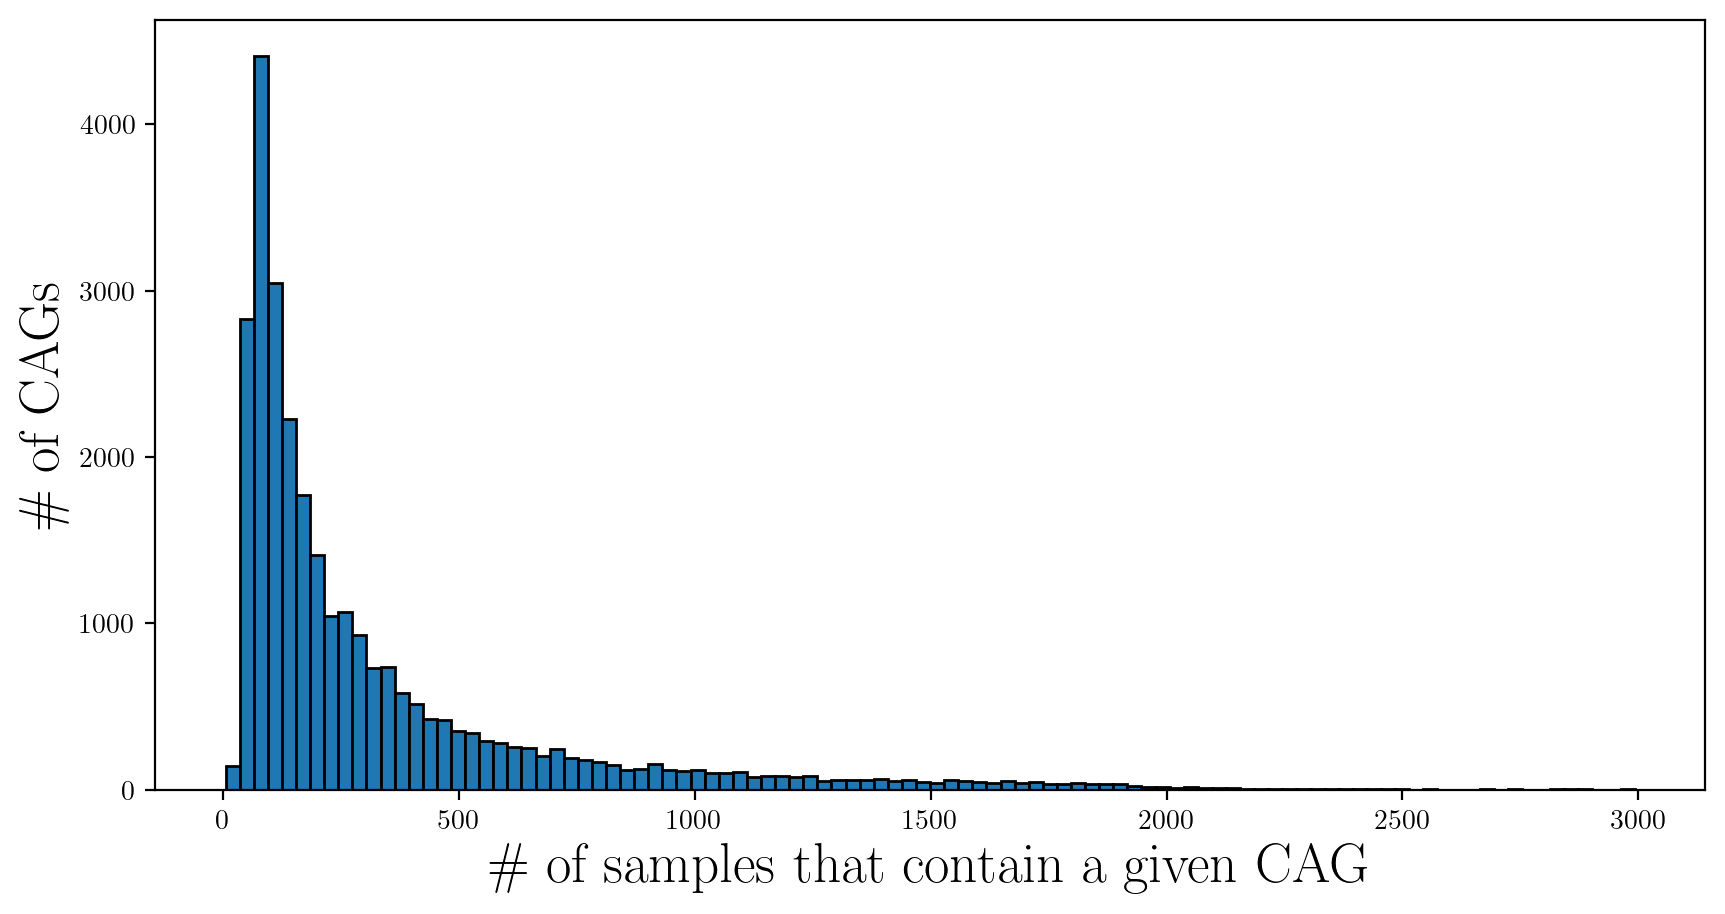

In [324]:
plt.figure(figsize=(10, 5), dpi=200)

plt.hist((CAG > 0).sum(axis=1), bins=100, edgecolor="black")

plt.xlabel("\# of samples that contain a given CAG", fontsize=20)
plt.ylabel("\# of CAGs", fontsize=20)

plt.show()

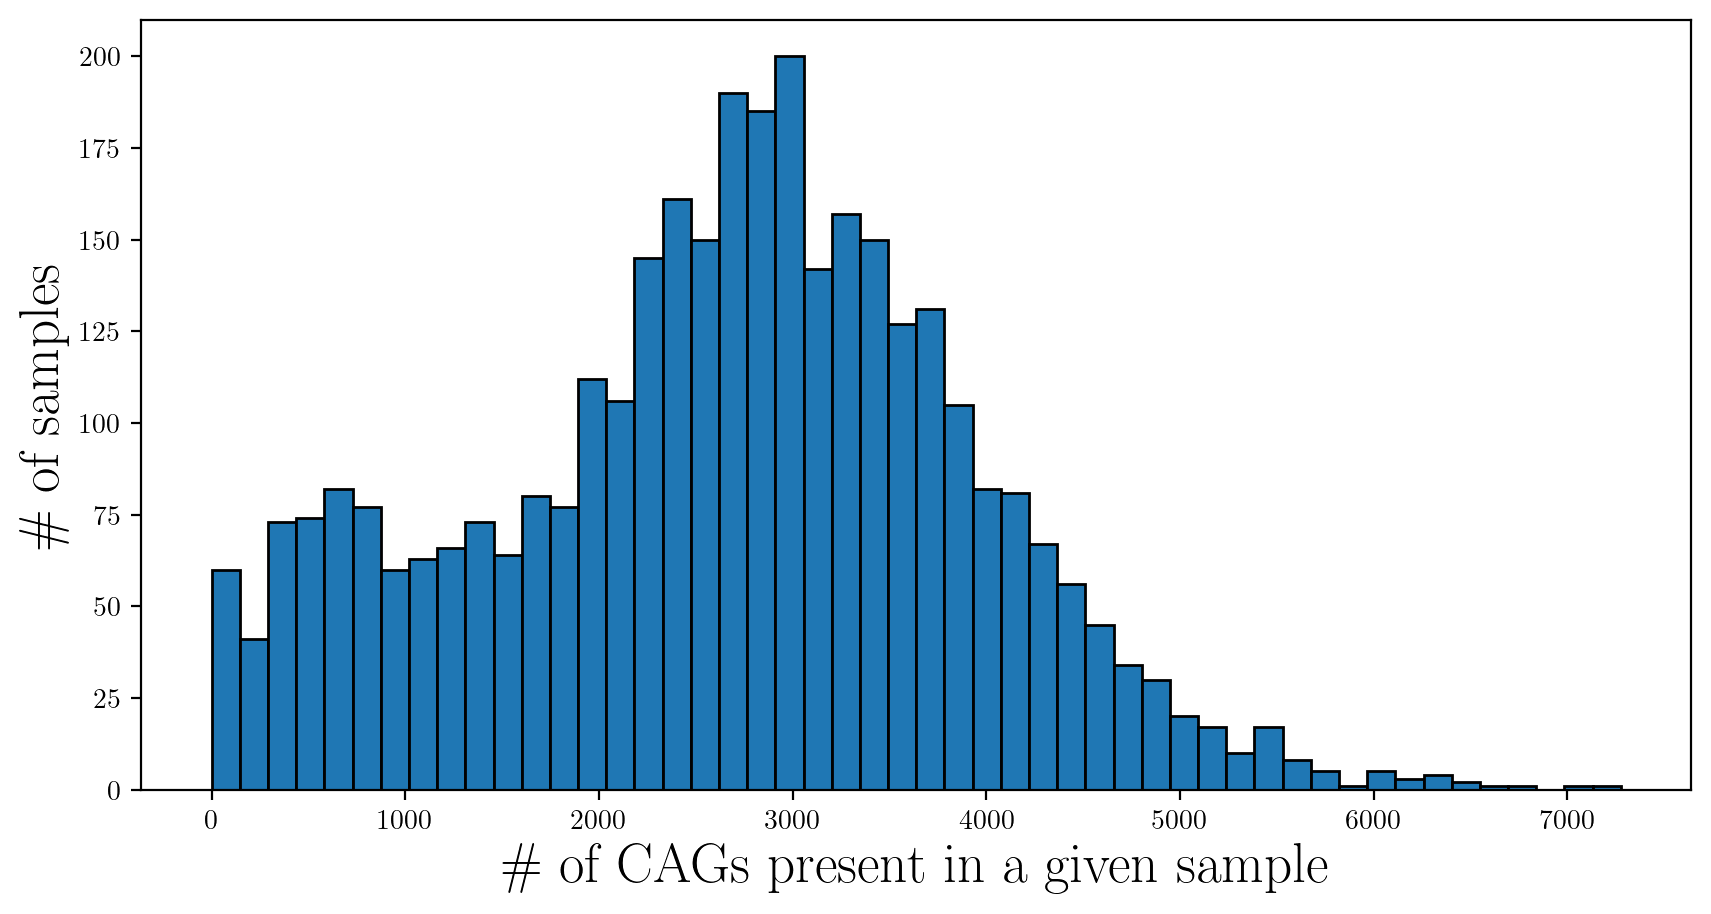

In [9]:
plt.figure(figsize=(10, 5), dpi=200)

CAG_presence = (CAG.T > 0)
counts = CAG_presence.sum(axis=1)

plt.hist(counts, bins=50, edgecolor="black")
plt.xlabel("\# of CAGs present in a given sample", fontsize=20)
plt.ylabel("\# of samples", fontsize=20)

plt.show()

In [10]:
counts = clusters.groupby(level=0).count()
MGS_CAGs = counts[(counts.iloc[:, 0] > 700)].index
nonMGS_CAGs = counts[(counts.iloc[:, 0] <= 700)].index

In [11]:
all_cags = counts.index
all_cags

Index(['CAG00001', 'CAG00002', 'CAG00003', 'CAG00004', 'CAG00005', 'CAG00006',
       'CAG00007', 'CAG00008', 'CAG00009', 'CAG00010',
       ...
       'CAG27809', 'CAG27810', 'CAG27811', 'CAG27812', 'CAG27813', 'CAG27814',
       'CAG27815', 'CAG27816', 'CAG27817', 'CAG27818'],
      dtype='object', name=0, length=27818)

In [62]:
has_CAG = {c : (CAG.loc[c] > 0).values.flatten() for c in all_cags}
has_CAG

{'CAG00001': array([False, False, False, ..., False, False, False]),
 'CAG00002': array([False, False, False, ..., False, False, False]),
 'CAG00003': array([False, False, False, ..., False, False, False]),
 'CAG00004': array([False, False, False, ..., False, False, False]),
 'CAG00005': array([False, False, False, ...,  True, False, False]),
 'CAG00006': array([False, False, False, ..., False, False, False]),
 'CAG00007': array([False, False, False, ...,  True, False, False]),
 'CAG00008': array([False, False, False, ...,  True, False, False]),
 'CAG00009': array([False, False, False, ..., False, False, False]),
 'CAG00010': array([False, False, False, ...,  True,  True,  True]),
 'CAG00011': array([False, False, False, ...,  True, False, False]),
 'CAG00012': array([False, False, False, ..., False, False, False]),
 'CAG00013': array([False, False, False, ..., False, False, False]),
 'CAG00014': array([False, False, False, ..., False,  True, False]),
 'CAG00015': array([False, False, 

In [52]:
# len(has_CAG)

In [53]:
# has_CAG[all_cags[0]]

# Detect dependencies

In [65]:
from scipy.stats import fisher_exact
from sklearn.metrics import matthews_corrcoef
from tqdm import tqdm

ass_dict = []
    
for CAG1 in tqdm(all_cags):
    has_CAG1 = has_CAG[CAG1]
    
    for CAG2 in all_cags:
        if CAG1 == CAG2: continue
            
        has_CAG2 = has_CAG[CAG2]
        
        tr = (~has_CAG1 & has_CAG2).sum()
        prop = tr / has_CAG2.sum()
        if prop > 0.2: continue

        table = (
            [[(has_CAG1 & has_CAG2).sum(), tr],
             [(has_CAG1 & ~has_CAG2).sum(), (~has_CAG1 & ~has_CAG2).sum()]
            ]
        )
        
        p = fisher_exact(table, "greater").pvalue
        ass_dict.append({"host" : CAG1, "dependent" : CAG2, "p" : p, "prop" : prop})

100%|███████████████████████████████████████████████████████| 27818/27818 [3:11:12<00:00,  2.42it/s]


In [66]:
len(ass_dict)

5710494

In [67]:
ass_dict

[{'host': 'CAG00001',
  'dependent': 'CAG00209',
  'p': 0.0,
  'prop': 0.01020408163265306},
 {'host': 'CAG00001',
  'dependent': 'CAG00233',
  'p': 0.0,
  'prop': 0.003401360544217687},
 {'host': 'CAG00001',
  'dependent': 'CAG00274',
  'p': 0.0,
  'prop': 0.013377926421404682},
 {'host': 'CAG00001',
  'dependent': 'CAG00323',
  'p': 0.0,
  'prop': 0.01056338028169014},
 {'host': 'CAG00001',
  'dependent': 'CAG00427',
  'p': 0.0,
  'prop': 0.02564102564102564},
 {'host': 'CAG00001',
  'dependent': 'CAG00456',
  'p': 0.0,
  'prop': 0.11011904761904762},
 {'host': 'CAG00001',
  'dependent': 'CAG00466',
  'p': 0.0,
  'prop': 0.04823151125401929},
 {'host': 'CAG00001',
  'dependent': 'CAG00484',
  'p': 5.288237444268058e-230,
  'prop': 0.015463917525773196},
 {'host': 'CAG00001',
  'dependent': 'CAG00487',
  'p': 0.0,
  'prop': 0.05825242718446602},
 {'host': 'CAG00001',
  'dependent': 'CAG00529',
  'p': 5.8900431087925576e-67,
  'prop': 0.04477611940298507},
 {'host': 'CAG00001',
  'depe

In [68]:
# import pickle

# with open(os.path.join("../output/logs", "association_dict_prop20perc.pkl"), "wb") as f:
#     pickle.dump(ass_dict, f)

In [427]:
import pickle

with open(os.path.join("../output/logs", "association_dict_prop.pkl"), "rb") as f:
    ass = pickle.load(f)
ass

[{'host': 'CAG00001',
  'dependent': 'CAG00233',
  'p': 0.0,
  'prop': 0.003401360544217687},
 {'host': 'CAG00001',
  'dependent': 'CAG00644',
  'p': 7.616686021405449e-106,
  'prop': 0.0},
 {'host': 'CAG00001',
  'dependent': 'CAG00773',
  'p': 1.1954910828323342e-56,
  'prop': 0.0},
 {'host': 'CAG00001',
  'dependent': 'CAG00960',
  'p': 1.6567784e-316,
  'prop': 0.008130081300813009},
 {'host': 'CAG00001',
  'dependent': 'CAG01116',
  'p': 2.1894812256023566e-112,
  'prop': 0.009900990099009901},
 {'host': 'CAG00001',
  'dependent': 'CAG02369',
  'p': 2.097715408495713e-188,
  'prop': 0.00625},
 {'host': 'CAG00001',
  'dependent': 'CAG12837',
  'p': 2.424443215344743e-256,
  'prop': 0.004830917874396135},
 {'host': 'CAG00002',
  'dependent': 'CAG00198',
  'p': 3.9866986251065166e-172,
  'prop': 0.0},
 {'host': 'CAG00002',
  'dependent': 'CAG00349',
  'p': 3.1964515382948876e-123,
  'prop': 0.0},
 {'host': 'CAG00002',
  'dependent': 'CAG00746',
  'p': 4.1046936218592227e-81,
  'prop'

In [428]:
max([a["prop"] for a in ass])

0.01

In [429]:
p_cutoff = 0

ass_dict_retained = [a for a in ass if a["p"] * (counts.shape[0] ** 2) <= p_cutoff]

len(ass_dict_retained)

2691

In [430]:
nodes = {a["host"] for a in ass_dict_retained} | {a["dependent"] for a in ass_dict_retained}
len(nodes)

1239

# Compute graph

In [431]:
import networkx as nx 

G = nx.DiGraph()

for node in nodes:
    G.add_node(node, color=("orange" if int(counts.loc[node]) > 700 else "steelblue"))
    
for a in ass_dict_retained:
    G.add_edge(a["dependent"], a["host"])

In [432]:
G.number_of_edges()

2691

In [433]:
nx.write_graphml(G, os.path.join(config.FIGURE_DIR, "p=0.graphml"))

# Verify dependency of example relationship

In [363]:
CAG1 = "CAG00003"
CAG2 = "CAG00283"

In [365]:
from scipy.stats import fisher_exact

has_CAG1 = has_CAG[CAG1]
has_CAG2 = has_CAG[CAG2]

table = pd.DataFrame(
    [
        [(has_CAG1 & has_CAG2).sum(), (~has_CAG1 & has_CAG2).sum()],
        [(has_CAG1 & ~has_CAG2).sum(), (~has_CAG1 & ~has_CAG2).sum()]
    ],
    columns=["has_CAG1", "no_CAG1"],
    index=["has_CAG2", "no_CAG2"]
)

print(fisher_exact(table, "greater").pvalue)


0.0


In [366]:
df = CAG.loc[[CAG1, CAG2]].T.sort_values(CAG1)
df

,CAG00003,CAG00283
Sample_ID,,
magic.0001,0.000000,0.000000
magic.3397,0.000000,0.000000
magic.3402,0.000000,0.000000
magic.3404,0.000000,0.000000
magic.3405,0.000000,0.000000
...,...,...
magic.1189,0.000125,0.000125
magic.0335,0.000131,0.000117
magic.0632,0.000163,0.000000


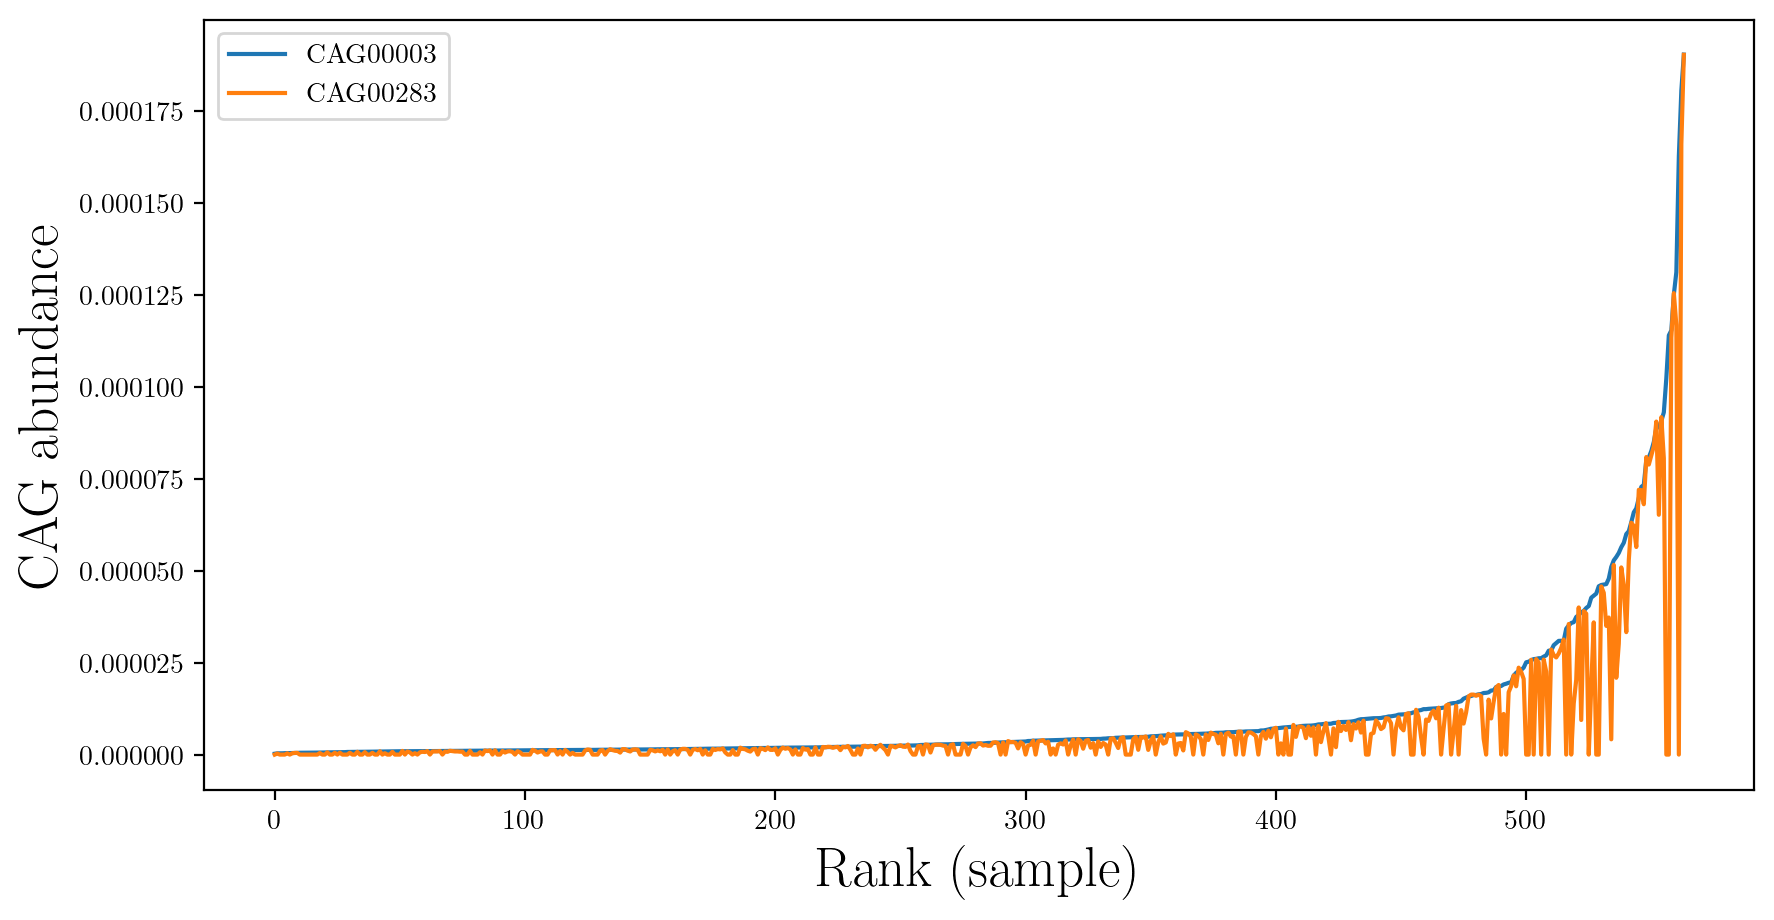

In [367]:
plt.figure(figsize=(10, 5), dpi=200)
plt.plot(df[df[CAG1] > 0][CAG1].values, label=CAG1)
plt.plot(df[df[CAG1] > 0][CAG2].values, label=CAG2)
plt.xlabel("Rank (sample)", fontsize=20)
plt.ylabel("CAG abundance", fontsize=20)
plt.legend()
plt.show()

# Find antagonistic relationships between CAGs that are dependent on the same host CAG

In [419]:
from collections import defaultdict

adjacency_list = defaultdict(list)

for a in ass_dict_retained:
    adjacency_list[a["host"]].append(a["dependent"])

adjacency_list

defaultdict(list,
            {'CAG00003': ['CAG00494'],
             'CAG00010': ['CAG00515', 'CAG01992', 'CAG02499'],
             'CAG00011': ['CAG00414'],
             'CAG00014': ['CAG00405'],
             'CAG00019': ['CAG00001', 'CAG00209', 'CAG00233', 'CAG00274'],
             'CAG00024': ['CAG00215'],
             'CAG00028': ['CAG05233'],
             'CAG00031': ['CAG00170', 'CAG04571'],
             'CAG00046': ['CAG00536'],
             'CAG00047': ['CAG00543'],
             'CAG00059': ['CAG00486'],
             'CAG00060': ['CAG09188'],
             'CAG00069': ['CAG00815'],
             'CAG00077': ['CAG03214', 'CAG14446'],
             'CAG00082': ['CAG00019',
              'CAG00409',
              'CAG00582',
              'CAG01853',
              'CAG02700',
              'CAG02769',
              'CAG03111'],
             'CAG00129': ['CAG00173'],
             'CAG00140': ['CAG00187'],
             'CAG00151': ['CAG06104'],
             'CAG00153': ['CAG00206'],
 

In [76]:
from sklearn.metrics import matthews_corrcoef
from tqdm import tqdm

antagonistic = []

for host in tqdm(adjacency_list):
    dependent = adjacency_list[host]
    if len(dependent) < 2 : continue
    for d1 in dependent:
        for d2 in dependent:
            if d1 == d2: continue
            has_CAG1 = has_CAG[d1]
            has_CAG2 = has_CAG[d2]
            has_either = has_CAG1 | has_CAG2
            coef = matthews_corrcoef(has_CAG1[has_either], has_CAG2[has_either])
#             if coef < 0:
#                 antagonistic.append({"d1" : d1, "d2" : d2, "coef" : coef, "host" : host})
            antagonistic.append({"d1" : d1, "d2" : d2, "coef" : coef, "host" : host})

100%|█████████████████████████████████████████████████████████████| 541/541 [00:52<00:00, 10.32it/s]


In [159]:
sorted_ant = sorted(antagonistic, key=lambda x : x["coef"])
sorted_ant

[{'d1': 'CAG00200',
  'd2': 'CAG05540',
  'coef': -0.7965580595292092,
  'host': 'CAG09965'},
 {'d1': 'CAG05540',
  'd2': 'CAG00200',
  'coef': -0.7965580595292092,
  'host': 'CAG09965'},
 {'d1': 'CAG00189',
  'd2': 'CAG00361',
  'coef': -0.7367980917605577,
  'host': 'CAG00199'},
 {'d1': 'CAG00361',
  'd2': 'CAG00189',
  'coef': -0.7367980917605577,
  'host': 'CAG00199'},
 {'d1': 'CAG00082',
  'd2': 'CAG00361',
  'coef': -0.7356992378000079,
  'host': 'CAG00199'},
 {'d1': 'CAG00361',
  'd2': 'CAG00082',
  'coef': -0.7356992378000079,
  'host': 'CAG00199'},
 {'d1': 'CAG00069',
  'd2': 'CAG13191',
  'coef': -0.7197452229299363,
  'host': 'CAG01112'},
 {'d1': 'CAG13191',
  'd2': 'CAG00069',
  'coef': -0.7197452229299363,
  'host': 'CAG01112'},
 {'d1': 'CAG00069',
  'd2': 'CAG13191',
  'coef': -0.7197452229299363,
  'host': 'CAG19024'},
 {'d1': 'CAG13191',
  'd2': 'CAG00069',
  'coef': -0.7197452229299363,
  'host': 'CAG19024'},
 {'d1': 'CAG01316',
  'd2': 'CAG02863',
  'coef': -0.7092799

In [165]:
strong_ant = [a for a in sorted_ant if a["coef"] < -0.5]
len(strong_ant)

378

In [168]:
for ant in strong_ant:
    G.add_edge(ant["d1"], ant["d2"], color="red")

In [420]:
from pyvis.network import Network

net = Network(notebook=True, directed=True)

net.from_nx(G)

net.show("example.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [170]:
strong_ant

[{'d1': 'CAG00200',
  'd2': 'CAG05540',
  'coef': -0.7965580595292092,
  'host': 'CAG09965'},
 {'d1': 'CAG05540',
  'd2': 'CAG00200',
  'coef': -0.7965580595292092,
  'host': 'CAG09965'},
 {'d1': 'CAG00189',
  'd2': 'CAG00361',
  'coef': -0.7367980917605577,
  'host': 'CAG00199'},
 {'d1': 'CAG00361',
  'd2': 'CAG00189',
  'coef': -0.7367980917605577,
  'host': 'CAG00199'},
 {'d1': 'CAG00082',
  'd2': 'CAG00361',
  'coef': -0.7356992378000079,
  'host': 'CAG00199'},
 {'d1': 'CAG00361',
  'd2': 'CAG00082',
  'coef': -0.7356992378000079,
  'host': 'CAG00199'},
 {'d1': 'CAG00069',
  'd2': 'CAG13191',
  'coef': -0.7197452229299363,
  'host': 'CAG01112'},
 {'d1': 'CAG13191',
  'd2': 'CAG00069',
  'coef': -0.7197452229299363,
  'host': 'CAG01112'},
 {'d1': 'CAG00069',
  'd2': 'CAG13191',
  'coef': -0.7197452229299363,
  'host': 'CAG19024'},
 {'d1': 'CAG13191',
  'd2': 'CAG00069',
  'coef': -0.7197452229299363,
  'host': 'CAG19024'},
 {'d1': 'CAG01316',
  'd2': 'CAG02863',
  'coef': -0.7092799

In [243]:
clusters.loc["CAG05540"]

,1,is_phage_gene,is_crispr_gene
0,,,
CAG05540,UniRef90_A6KYT0,False,False
CAG05540,UniRef90_A0A0N7J6T9,True,False
CAG05540,UniRef90_A0A396FFB3,False,False
CAG05540,UniRef90_A6KYT7,False,False
CAG05540,UniRef90_A6KYT6,False,False
CAG05540,UniRef90_C6Z0B2,False,False
CAG05540,UniRef90_A0A0P0LCK6,True,False
CAG05540,UniRef90_A0A1Q6IVI8,False,False


In [282]:
clusters.loc["CAG05487"]

,1,is_phage_gene,is_crispr_gene
0,,,
CAG05487,UniRef90_A0A2J4JPE2,False,False
CAG05487,UniRef90_A0A2J4JLT2,False,False
CAG05487,UniRef90_A0A1C6GRX2,False,False
CAG05487,UniRef90_E2ZJ54,False,True
CAG05487,UniRef90_E2ZJ53,False,True
CAG05487,UniRef90_A0A2A7ARI4,False,False
CAG05487,UniRef90_E2ZJ51,False,False
CAG05487,UniRef90_E2ZMK7,False,False


In [203]:
crisp_set = set(potential_crispr)
phage_set = set(potential_phages)

for ant in strong_ant:
    if ant["d1"] in crisp_set:
        print(ant)

{'d1': 'CAG05324', 'd2': 'CAG15733', 'coef': -0.5523789251386998, 'host': 'CAG00031'}
{'d1': 'CAG05487', 'd2': 'CAG04424', 'coef': -0.5428056769227836, 'host': 'CAG04459'}
{'d1': 'CAG00405', 'd2': 'CAG06021', 'coef': -0.5150282183787916, 'host': 'CAG00223'}
{'d1': 'CAG05324', 'd2': 'CAG04571', 'coef': -0.5016636963254147, 'host': 'CAG00031'}
{'d1': 'CAG05324', 'd2': 'CAG04571', 'coef': -0.5016636963254147, 'host': 'CAG01110'}
{'d1': 'CAG05324', 'd2': 'CAG06231', 'coef': -0.5013457714056234, 'host': 'CAG00031'}


In [294]:
strong_ant_CAGs = set([a['d1'] for a in strong_ant])
len(strong_ant_CAGs)

106

In [309]:
clusters.loc["CAG00001"].shape[0]

11642

In [310]:
for ant in strong_ant:
    print(ant)
    print(clusters.loc[ant["d1"]].shape[0])
    print(clusters.loc[ant["d2"]].shape[0])

{'d1': 'CAG00200', 'd2': 'CAG05540', 'coef': -0.7965580595292092, 'host': 'CAG09965'}
582
8
{'d1': 'CAG05540', 'd2': 'CAG00200', 'coef': -0.7965580595292092, 'host': 'CAG09965'}
8
582
{'d1': 'CAG00189', 'd2': 'CAG00361', 'coef': -0.7367980917605577, 'host': 'CAG00199'}
644
152
{'d1': 'CAG00361', 'd2': 'CAG00189', 'coef': -0.7367980917605577, 'host': 'CAG00199'}
152
644
{'d1': 'CAG00082', 'd2': 'CAG00361', 'coef': -0.7356992378000079, 'host': 'CAG00199'}
1598
152
{'d1': 'CAG00361', 'd2': 'CAG00082', 'coef': -0.7356992378000079, 'host': 'CAG00199'}
152
1598
{'d1': 'CAG00069', 'd2': 'CAG13191', 'coef': -0.7197452229299363, 'host': 'CAG01112'}
1730
3
{'d1': 'CAG13191', 'd2': 'CAG00069', 'coef': -0.7197452229299363, 'host': 'CAG01112'}
3
1730
{'d1': 'CAG00069', 'd2': 'CAG13191', 'coef': -0.7197452229299363, 'host': 'CAG19024'}
1730
3
{'d1': 'CAG13191', 'd2': 'CAG00069', 'coef': -0.7197452229299363, 'host': 'CAG19024'}
3
1730
{'d1': 'CAG01316', 'd2': 'CAG02863', 'coef': -0.7092799995207413, 

In [312]:
clusters.loc["CAG10466"]

,1,is_phage_gene,is_crispr_gene
0,,,
CAG10466,UniRef90_Q8A6W3,False,False
CAG10466,UniRef90_R6VEJ3,False,False
CAG10466,UniRef90_A0A0P0F2Q3,False,False
CAG10466,UniRef90_R7KDU3,False,False


In [376]:
dep = set([a["dependent"] for a in ass_dict_retained])

In [389]:
host = set([a["host"] for a in ass_dict_retained])

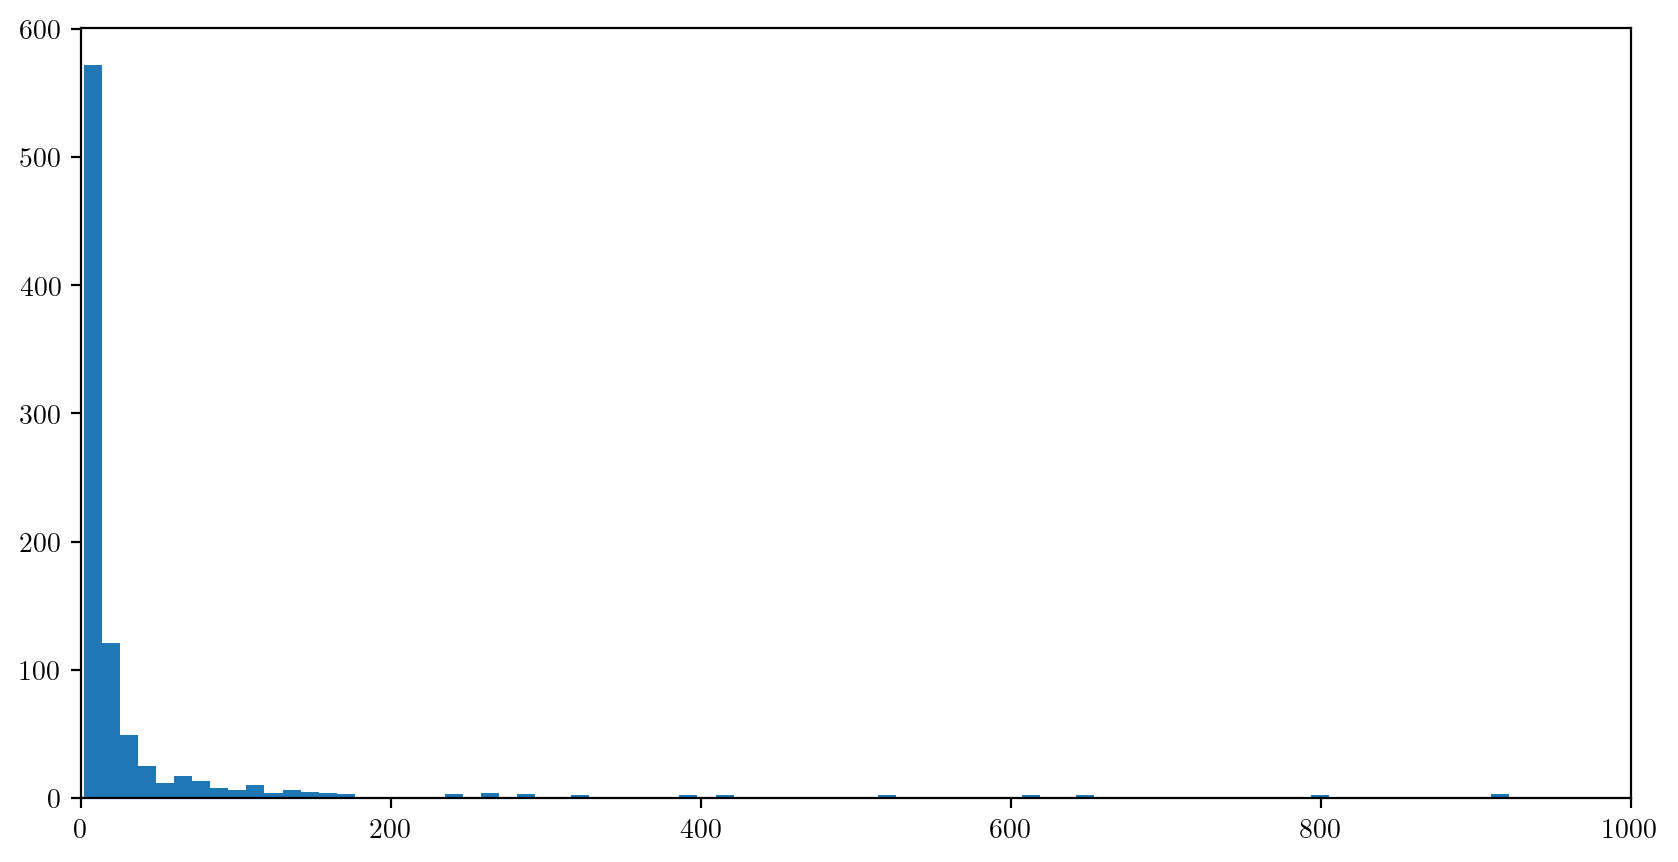

In [388]:
import seaborn as sns

plt.figure(figsize=(10, 5), dpi=200)

plt.hist([clusters.loc[d].shape[0] for d in dep], bins=1000)

plt.xlim(0, 1000)

plt.show()

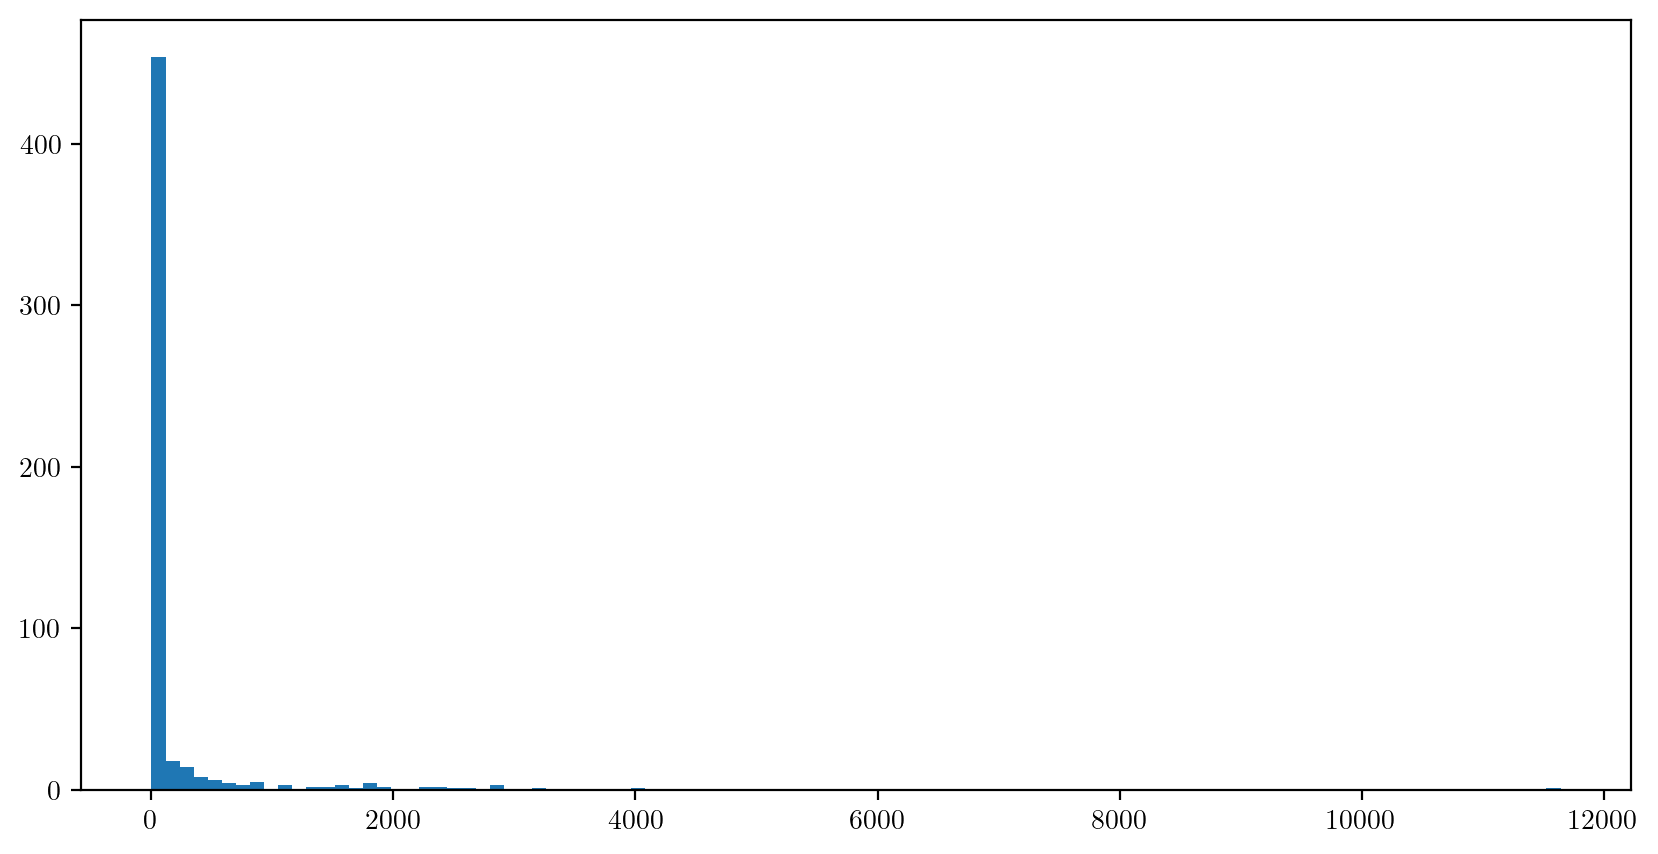

In [390]:
plt.figure(figsize=(10, 5), dpi=200)

plt.hist([clusters.loc[h].shape[0] for h in host], bins=100)

plt.show()

In [345]:
(CAG.loc["CAG19396"] > 0).sum()

1650

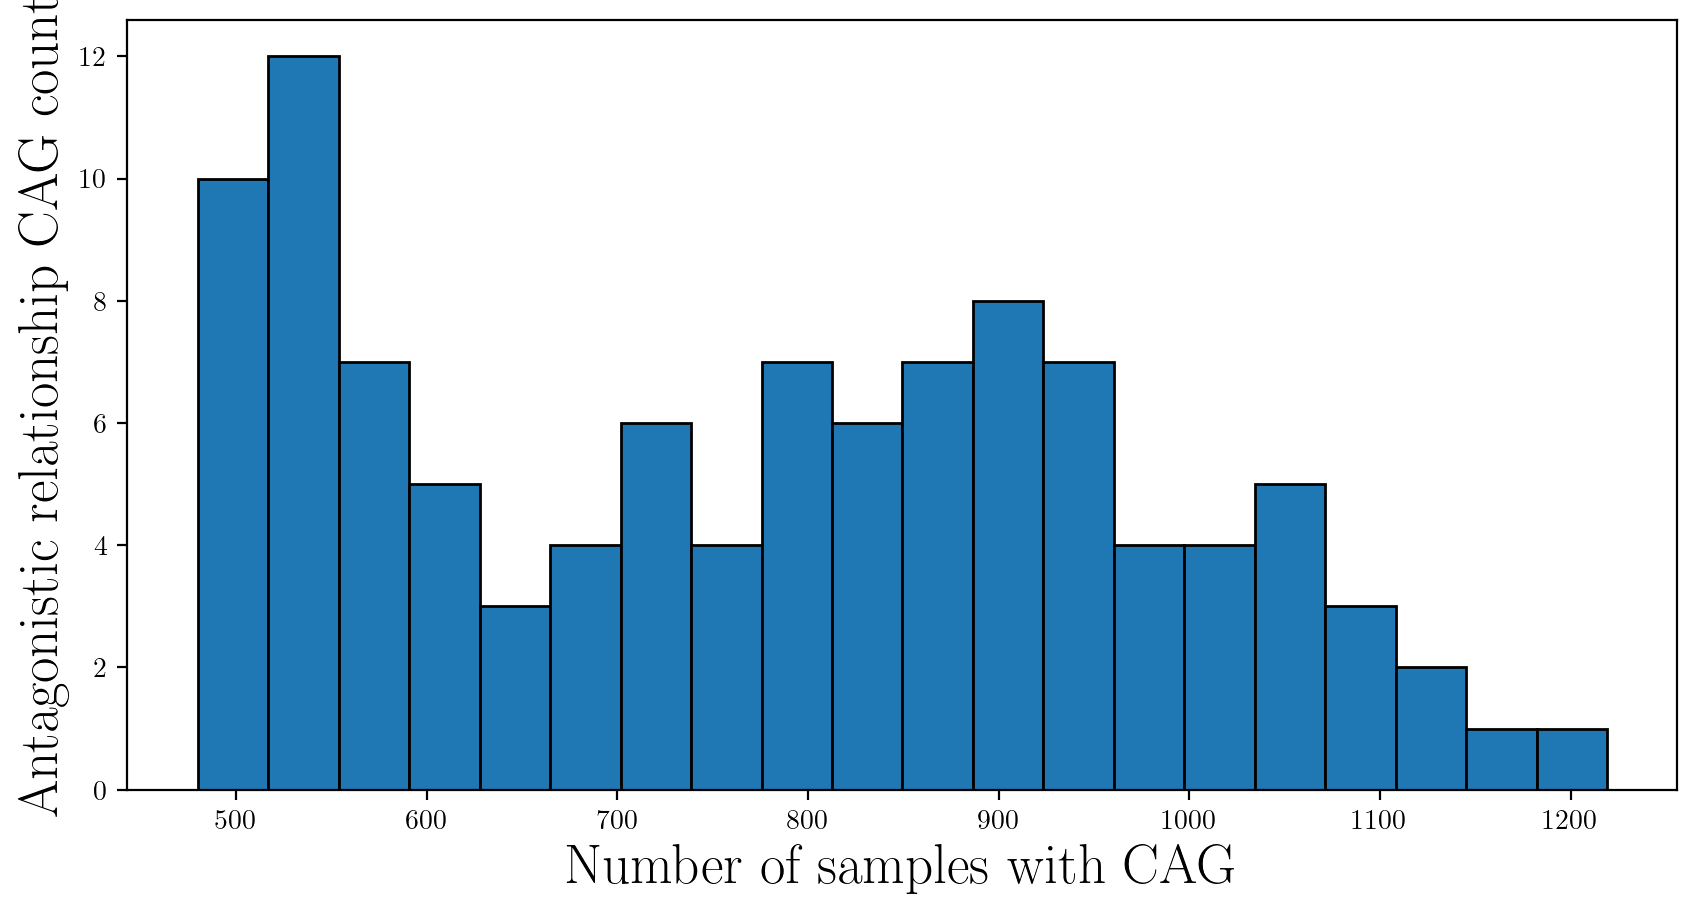

In [356]:
plt.figure(figsize=(10, 5), dpi=200)

plt.hist([(CAG.loc[sa] > 0).sum() for sa in strong_ant_CAGs], bins=20, edgecolor="black")

plt.ylabel("Antagonistic relationship CAG count", fontsize=20)
plt.xlabel("Number of samples with CAG", fontsize=20)

plt.show()

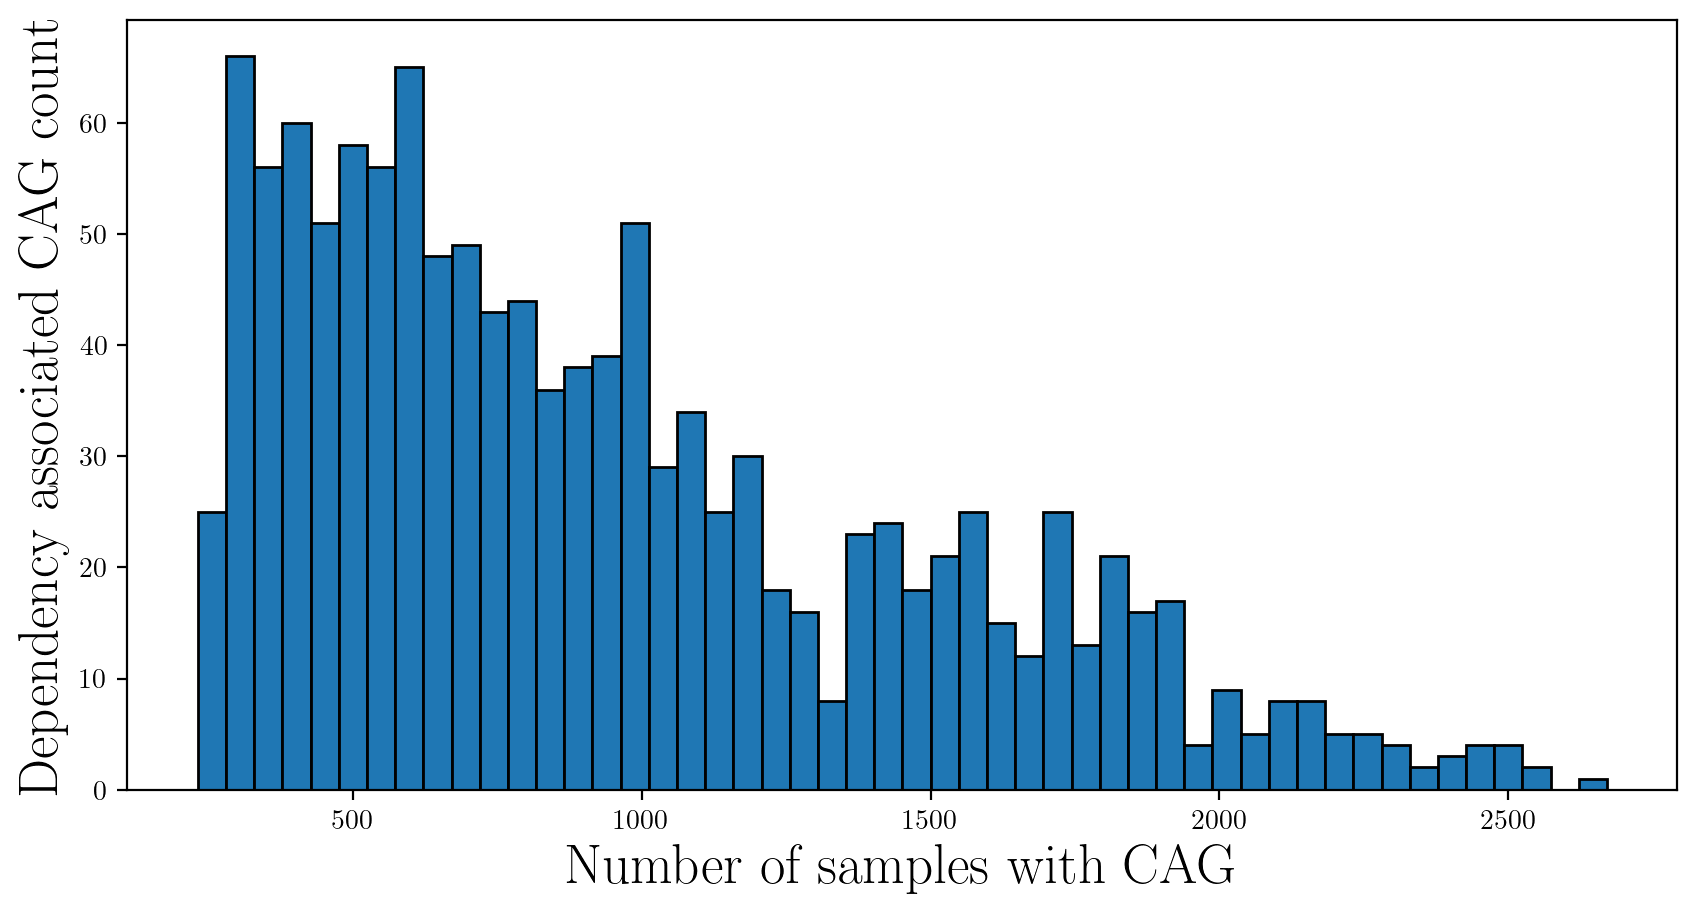

In [357]:
plt.figure(figsize=(10, 5), dpi=200)

plt.hist([(CAG.loc[no] > 0).sum() for no in nodes], bins=50, edgecolor="black")

plt.ylabel("Dependency associated CAG count", fontsize=20)
plt.xlabel("Number of samples with CAG", fontsize=20)

plt.show()

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_17745/2728970728.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  (CAG.loc[strong_ant_CAGs] > 0).sum(axis=0).plot.hist(bins=50)


<Axes: ylabel='Frequency'>

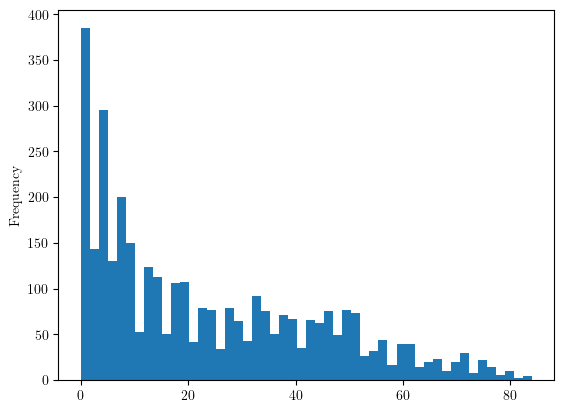

In [319]:
(CAG.loc[strong_ant_CAGs] > 0).sum(axis=0).plot.hist(bins=50)

In [292]:

for ant in strong_ant:
    print(ant)
    print((CAG.loc[ant['d1']] > 0).sum())
    print((CAG.loc[ant['d2']] > 0).sum())

{'d1': 'CAG00200', 'd2': 'CAG05540', 'coef': -0.7965580595292092, 'host': 'CAG09965'}
548
628
{'d1': 'CAG05540', 'd2': 'CAG00200', 'coef': -0.7965580595292092, 'host': 'CAG09965'}
628
548
{'d1': 'CAG00189', 'd2': 'CAG00361', 'coef': -0.7367980917605577, 'host': 'CAG00199'}
486
535
{'d1': 'CAG00361', 'd2': 'CAG00189', 'coef': -0.7367980917605577, 'host': 'CAG00199'}
535
486
{'d1': 'CAG00082', 'd2': 'CAG00361', 'coef': -0.7356992378000079, 'host': 'CAG00199'}
489
535
{'d1': 'CAG00361', 'd2': 'CAG00082', 'coef': -0.7356992378000079, 'host': 'CAG00199'}
535
489
{'d1': 'CAG00069', 'd2': 'CAG13191', 'coef': -0.7197452229299363, 'host': 'CAG01112'}
785
785
{'d1': 'CAG13191', 'd2': 'CAG00069', 'coef': -0.7197452229299363, 'host': 'CAG01112'}
785
785
{'d1': 'CAG00069', 'd2': 'CAG13191', 'coef': -0.7197452229299363, 'host': 'CAG19024'}
785
785
{'d1': 'CAG13191', 'd2': 'CAG00069', 'coef': -0.7197452229299363, 'host': 'CAG19024'}
785
785
{'d1': 'CAG01316', 'd2': 'CAG02863', 'coef': -0.709279999520

601
{'d1': 'CAG17022', 'd2': 'CAG03511', 'coef': -0.6201537517197169, 'host': 'CAG00139'}
601
518
{'d1': 'CAG00272', 'd2': 'CAG05736', 'coef': -0.6163918701655389, 'host': 'CAG01112'}
920
947
{'d1': 'CAG05736', 'd2': 'CAG00272', 'coef': -0.6163918701655389, 'host': 'CAG01112'}
947
920
{'d1': 'CAG00010', 'd2': 'CAG00060', 'coef': -0.6116309407322008, 'host': 'CAG02442'}
874
717
{'d1': 'CAG00060', 'd2': 'CAG00010', 'coef': -0.6116309407322008, 'host': 'CAG02442'}
717
874
{'d1': 'CAG00060', 'd2': 'CAG15470', 'coef': -0.6075579645736886, 'host': 'CAG13933'}
717
705
{'d1': 'CAG15470', 'd2': 'CAG00060', 'coef': -0.6075579645736886, 'host': 'CAG13933'}
705
717
{'d1': 'CAG00170', 'd2': 'CAG11947', 'coef': -0.5998825893067291, 'host': 'CAG11850'}
987
1050
{'d1': 'CAG11947', 'd2': 'CAG00170', 'coef': -0.5998825893067291, 'host': 'CAG11850'}
1050
987
{'d1': 'CAG00060', 'd2': 'CAG16450', 'coef': -0.5958613990968471, 'host': 'CAG00195'}
717
840
{'d1': 'CAG16450', 'd2': 'CAG00060', 'coef': -0.595861

544
{'d1': 'CAG12472', 'd2': 'CAG10724', 'coef': -0.5348868341226366, 'host': 'CAG00077'}
544
523
{'d1': 'CAG00371', 'd2': 'CAG02179', 'coef': -0.531606503823347, 'host': 'CAG00153'}
917
898
{'d1': 'CAG02179', 'd2': 'CAG00371', 'coef': -0.531606503823347, 'host': 'CAG00153'}
898
917
{'d1': 'CAG00010', 'd2': 'CAG13015', 'coef': -0.5314996870819503, 'host': 'CAG02043'}
874
872
{'d1': 'CAG13015', 'd2': 'CAG00010', 'coef': -0.5314996870819503, 'host': 'CAG02043'}
872
874
{'d1': 'CAG00010', 'd2': 'CAG13015', 'coef': -0.5314996870819503, 'host': 'CAG05329'}
874
872
{'d1': 'CAG13015', 'd2': 'CAG00010', 'coef': -0.5314996870819503, 'host': 'CAG05329'}
872
874
{'d1': 'CAG00010', 'd2': 'CAG00299', 'coef': -0.5307360161947413, 'host': 'CAG02043'}
874
1122
{'d1': 'CAG00299', 'd2': 'CAG00010', 'coef': -0.5307360161947413, 'host': 'CAG02043'}
1122
874
{'d1': 'CAG00010', 'd2': 'CAG00299', 'coef': -0.5307360161947413, 'host': 'CAG05329'}
874
1122
{'d1': 'CAG00299', 'd2': 'CAG00010', 'coef': -0.5307360

858
{'d1': 'CAG18281', 'd2': 'CAG00620', 'coef': -0.5111123321450205, 'host': 'CAG01110'}
858
848
{'d1': 'CAG14178', 'd2': 'CAG14325', 'coef': -0.5106982118552722, 'host': 'CAG00195'}
781
904
{'d1': 'CAG14325', 'd2': 'CAG14178', 'coef': -0.5106982118552722, 'host': 'CAG00195'}
904
781
{'d1': 'CAG14178', 'd2': 'CAG14325', 'coef': -0.5106982118552722, 'host': 'CAG02959'}
781
904
{'d1': 'CAG14325', 'd2': 'CAG14178', 'coef': -0.5106982118552722, 'host': 'CAG02959'}
904
781
{'d1': 'CAG06577', 'd2': 'CAG14394', 'coef': -0.5106272572334342, 'host': 'CAG00031'}
920
857
{'d1': 'CAG14394', 'd2': 'CAG06577', 'coef': -0.5106272572334342, 'host': 'CAG00031'}
857
920
{'d1': 'CAG06577', 'd2': 'CAG14394', 'coef': -0.5106272572334342, 'host': 'CAG01110'}
920
857
{'d1': 'CAG14394', 'd2': 'CAG06577', 'coef': -0.5106272572334342, 'host': 'CAG01110'}
857
920
{'d1': 'CAG13015', 'd2': 'CAG22961', 'coef': -0.5101850808991132, 'host': 'CAG02336'}
872
817
{'d1': 'CAG22961', 'd2': 'CAG13015', 'coef': -0.51018508

In [283]:
putative_phages = set(phage_gene_proportions[phage_gene_proportions.iloc[:, 0] >= 0.5].index)
putative_crispr = set(crispr_gene_proportions[crispr_gene_proportions.iloc[:, 0] >= 0.25].index)
print(len(putative_phages), len(putative_crispr))
print(len(putative_phages & set(nodes)), len(putative_crispr & set(nodes)))

390 89
8 2


In [280]:
import networkx as nx 

G = nx.DiGraph()

for node in nodes:
    G.add_node(node, color=("green" if node in putative_phages else "purple" if node in putative_crispr else "orange" if int(counts.loc[node]) > 700 else "steelblue"))
    
for a in ass_dict_retained:
    G.add_edge(a["dependent"], a["host"])
    
for ant in strong_ant:
    G.add_edge(ant["d1"], ant["d2"], color="red")

In [281]:
from pyvis.network import Network

net = Network(notebook=True, directed=True)

net.from_nx(G)

net.show("example.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [275]:
clusters.loc["CAG00038"].mean()

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_17745/1908708530.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  clusters.loc["CAG00038"].mean()


is_phage_gene     0.000000
is_crispr_gene    0.000498
dtype: float64

In [204]:
for ant in strong_ant:
    if ant["d1"] in phage_set:
        print(ant)

{'d1': 'CAG05540', 'd2': 'CAG00200', 'coef': -0.7965580595292092, 'host': 'CAG09965'}
{'d1': 'CAG00189', 'd2': 'CAG00361', 'coef': -0.7367980917605577, 'host': 'CAG00199'}
{'d1': 'CAG00082', 'd2': 'CAG00361', 'coef': -0.7356992378000079, 'host': 'CAG00199'}
{'d1': 'CAG00069', 'd2': 'CAG13191', 'coef': -0.7197452229299363, 'host': 'CAG01112'}
{'d1': 'CAG00069', 'd2': 'CAG13191', 'coef': -0.7197452229299363, 'host': 'CAG19024'}
{'d1': 'CAG01316', 'd2': 'CAG02863', 'coef': -0.7092799995207413, 'host': 'CAG02442'}
{'d1': 'CAG00069', 'd2': 'CAG00515', 'coef': -0.7012345897857468, 'host': 'CAG19024'}
{'d1': 'CAG00060', 'd2': 'CAG02863', 'coef': -0.6973830632840761, 'host': 'CAG02442'}
{'d1': 'CAG00069', 'd2': 'CAG01456', 'coef': -0.6887613785890405, 'host': 'CAG01112'}
{'d1': 'CAG00069', 'd2': 'CAG01456', 'coef': -0.6887613785890405, 'host': 'CAG19024'}
{'d1': 'CAG01316', 'd2': 'CAG01248', 'coef': -0.6867747625445224, 'host': 'CAG02442'}
{'d1': 'CAG01316', 'd2': 'CAG00515', 'coef': -0.680519

In [150]:
CAG1 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1])
CAG2 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])
has_either = (CAG1 == 1) | (CAG2 == 1)
matthews_corrcoef(CAG1[has_either], CAG2[has_either])

-0.8

In [165]:
depend = []

for c in tqdm(all_cags):
    has_CAG1 = has_CAG[c]
    has_CAG2 = has_CAG["CAG00161"]

    table = pd.DataFrame(
        [
            [(has_CAG1 & has_CAG2).sum(), (~has_CAG1 & has_CAG2).sum()],
            [(has_CAG1 & ~has_CAG2).sum(), (~has_CAG1 & ~has_CAG2).sum()]
        ],
        columns=["has_CAG1", "no_CAG1"],
        index=["has_CAG2", "no_CAG2"]
    )
    tr = (~has_CAG1 & has_CAG2).sum()
    prop1 = tr / has_CAG2.sum()

    p1 = fisher_exact(table, "greater").pvalue
    
    has_CAG1 = has_CAG[c]
    has_CAG2 = has_CAG["CAG01784"]

    table = pd.DataFrame(
        [
            [(has_CAG1 & has_CAG2).sum(), (~has_CAG1 & has_CAG2).sum()],
            [(has_CAG1 & ~has_CAG2).sum(), (~has_CAG1 & ~has_CAG2).sum()]
        ],
        columns=["has_CAG1", "no_CAG1"],
        index=["has_CAG2", "no_CAG2"]
    )
    
    tr = (~has_CAG1 & has_CAG2).sum()
    prop2 = tr / has_CAG2.sum()

    p2 = fisher_exact(table, "greater").pvalue
    depend.append({"p1" : p1, "p2" : p2, "prop1" : prop1, "prop2" : prop2, "host" : c})

100%|████████████████████████████████████████████████████████| 27818/27818 [00:28<00:00, 970.78it/s]


In [216]:
sorted(depend, key=lambda x : x["p1"] + x["p2"])

[{'p1': 0.0003130991441038615,
  'p2': 0.0003611182502319246,
  'prop1': 0.2782874617737003,
  'prop2': 0.2870229007633588,
  'host': 'CAG12086'},
 {'p1': 0.007138072170878545,
  'p2': 1.764862924792798e-05,
  'prop1': 0.2579001019367992,
  'prop2': 0.24732824427480915,
  'host': 'CAG24483'},
 {'p1': 0.0025499845283692237,
  'p2': 0.013089169066087517,
  'prop1': 0.9867482161060143,
  'prop2': 0.9893129770992366,
  'host': 'CAG12328'},
 {'p1': 0.018089649880610594,
  'p2': 0.0029496013592957776,
  'prop1': 0.9908256880733946,
  'prop2': 0.9908396946564886,
  'host': 'CAG04906'},
 {'p1': 0.007164578928715379,
  'p2': 0.01560502099239859,
  'prop1': 0.981651376146789,
  'prop2': 0.983969465648855,
  'host': 'CAG12035'},
 {'p1': 0.009054125615548988,
  'p2': 0.01650482973353616,
  'prop1': 0.9826707441386341,
  'prop2': 0.9847328244274809,
  'host': 'CAG13005'},
 {'p1': 0.0065694721014229115,
  'p2': 0.020922236973085307,
  'prop1': 0.9959225280326198,
  'prop2': 0.9969465648854962,
  'ho

In [126]:
old_ant = antagonistic

In [127]:
sorted(old_ant, key=lambda x : x["coef"])

[{'d1': 'CAG00151',
  'd2': 'CAG27012',
  'coef': -0.1930451481677551,
  'host': 'CAG00216'},
 {'d1': 'CAG27012',
  'd2': 'CAG00151',
  'coef': -0.1930451481677551,
  'host': 'CAG00216'},
 {'d1': 'CAG01172',
  'd2': 'CAG27012',
  'coef': -0.1908106595314443,
  'host': 'CAG00216'},
 {'d1': 'CAG27012',
  'd2': 'CAG01172',
  'coef': -0.1908106595314443,
  'host': 'CAG00216'},
 {'d1': 'CAG09220',
  'd2': 'CAG27012',
  'coef': -0.18695075120287027,
  'host': 'CAG00216'},
 {'d1': 'CAG27012',
  'd2': 'CAG09220',
  'coef': -0.18695075120287027,
  'host': 'CAG00216'},
 {'d1': 'CAG00140',
  'd2': 'CAG15026',
  'coef': -0.17841030461502574,
  'host': 'CAG00770'},
 {'d1': 'CAG15026',
  'd2': 'CAG00140',
  'coef': -0.17841030461502574,
  'host': 'CAG00770'},
 {'d1': 'CAG15885',
  'd2': 'CAG27012',
  'coef': -0.17723831857699474,
  'host': 'CAG00216'},
 {'d1': 'CAG27012',
  'd2': 'CAG15885',
  'coef': -0.17723831857699474,
  'host': 'CAG00216'},
 {'d1': 'CAG00187',
  'd2': 'CAG15026',
  'coef': -0.1

In [113]:
clusters.loc["CAG25150"]

,1,is_phage_gene,is_crispr_gene
0,,,
CAG25150,UniRef90_A0A1S2VTQ1,False,False
CAG25150,UniRef90_A0A087BQT7,False,False


In [29]:
import networkx as nx

# comps = list(nx.strongly_connected_components(G))
comps = list(nx.weakly_connected_components(G))
comps

[{'CAG00001',
  'CAG00009',
  'CAG00019',
  'CAG00082',
  'CAG00117',
  'CAG00153',
  'CAG00154',
  'CAG00171',
  'CAG00174',
  'CAG00189',
  'CAG00193',
  'CAG00199',
  'CAG00206',
  'CAG00209',
  'CAG00233',
  'CAG00243',
  'CAG00249',
  'CAG00262',
  'CAG00263',
  'CAG00264',
  'CAG00271',
  'CAG00274',
  'CAG00277',
  'CAG00278',
  'CAG00323',
  'CAG00327',
  'CAG00347',
  'CAG00350',
  'CAG00361',
  'CAG00368',
  'CAG00371',
  'CAG00372',
  'CAG00378',
  'CAG00383',
  'CAG00397',
  'CAG00406',
  'CAG00407',
  'CAG00409',
  'CAG00417',
  'CAG00427',
  'CAG00442',
  'CAG00447',
  'CAG00456',
  'CAG00458',
  'CAG00462',
  'CAG00466',
  'CAG00487',
  'CAG00513',
  'CAG00525',
  'CAG00553',
  'CAG00566',
  'CAG00580',
  'CAG00582',
  'CAG00589',
  'CAG00592',
  'CAG00593',
  'CAG00599',
  'CAG00603',
  'CAG00619',
  'CAG00621',
  'CAG00624',
  'CAG00638',
  'CAG00646',
  'CAG00663',
  'CAG00685',
  'CAG00725',
  'CAG00731',
  'CAG00756',
  'CAG00765',
  'CAG00784',
  'CAG00789',
  'CAG

In [30]:
len(comps)

202

In [31]:
antagonistic = []

for comp in tqdm(comps):
    for c1 in comp:
        for c2 in comp:
            if c1 == c2: continue
            has_CAG1 = has_CAG[c1]
            has_CAG2 = has_CAG[c2]
            coef = matthews_corrcoef(has_CAG1, has_CAG2)
            if coef < 0:
                antagonistic.append({"d1" : c1, "d2" : c2, "coef" : coef, "host" : host})

100%|██████████████████████████████████████████████████████████████████████████████████████████| 202/202 [16:09<00:00,  4.80s/it]


In [32]:
sorted(antagonistic, key=lambda x : x["coef"])

[{'d1': 'CAG13300',
  'd2': 'CAG24772',
  'coef': -0.17389888711225954,
  'host': 'CAG27808'},
 {'d1': 'CAG24772',
  'd2': 'CAG13300',
  'coef': -0.17389888711225954,
  'host': 'CAG27808'},
 {'d1': 'CAG24772',
  'd2': 'CAG04968',
  'coef': -0.13622225795999912,
  'host': 'CAG27808'},
 {'d1': 'CAG04968',
  'd2': 'CAG24772',
  'coef': -0.13622225795999912,
  'host': 'CAG27808'},
 {'d1': 'CAG11088',
  'd2': 'CAG24772',
  'coef': -0.13365740377761928,
  'host': 'CAG27808'},
 {'d1': 'CAG24772',
  'd2': 'CAG11088',
  'coef': -0.13365740377761928,
  'host': 'CAG27808'},
 {'d1': 'CAG22212',
  'd2': 'CAG24772',
  'coef': -0.13018836220921196,
  'host': 'CAG27808'},
 {'d1': 'CAG24772',
  'd2': 'CAG22212',
  'coef': -0.13018836220921196,
  'host': 'CAG27808'},
 {'d1': 'CAG24772',
  'd2': 'CAG26750',
  'coef': -0.12219332009777548,
  'host': 'CAG27808'},
 {'d1': 'CAG26750',
  'd2': 'CAG24772',
  'coef': -0.12219332009777548,
  'host': 'CAG27808'},
 {'d1': 'CAG24772',
  'd2': 'CAG05602',
  'coef': 

# Look for phage enriched CAGs

In [174]:
phage = pd.read_csv(os.path.join(config.RAW_DIR, "phage.txt"), header=None)

In [175]:
phage_genes_in_CAGs = set(phage.iloc[:, 0]) & set(clusters.iloc[:, 0])

In [176]:
is_phage_gene = clusters.iloc[:, 0].apply(lambda x : x in phage_genes_in_CAGs)

In [177]:
clusters["is_phage_gene"] = is_phage_gene

In [178]:
phage_gene_distribution = clusters.groupby(level=0).sum()[["is_phage_gene"]]

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_17745/2207627127.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  phage_gene_distribution = clusters.groupby(level=0).sum()[["is_phage_gene"]]


In [179]:
phage_gene_distribution

,is_phage_gene
0,
CAG00001,2
CAG00002,5
CAG00003,5
CAG00004,3
CAG00005,11
...,...
CAG27814,0
CAG27815,0
CAG27816,0


In [180]:
phage_gene_proportions = np.divide(phage_gene_distribution, counts)

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_17745/3229526074.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  phage_gene_proportions = np.divide(phage_gene_distribution, counts)


In [198]:
phage_gene_proportions[phage_gene_proportions.iloc[:, 0] > 0].sort_values("is_phage_gene", ascending=False)

,is_phage_gene
0,
CAG23659,1.000000
CAG24842,1.000000
CAG23718,1.000000
CAG23879,1.000000
CAG24075,1.000000
...,...
CAG00023,0.000420
CAG00020,0.000415
CAG00014,0.000384


In [196]:
potential_phages = phage_gene_proportions[phage_gene_proportions.iloc[:, 0] > 0].sort_values("is_phage_gene", ascending=False).index
potential_phages

Index(['CAG23659', 'CAG24842', 'CAG23718', 'CAG23879', 'CAG24075', 'CAG24112',
       'CAG19342', 'CAG07957', 'CAG08451', 'CAG24873',
       ...
       'CAG00040', 'CAG00037', 'CAG00036', 'CAG00032', 'CAG00030', 'CAG00023',
       'CAG00020', 'CAG00014', 'CAG00010', 'CAG00001'],
      dtype='object', name=0, length=1961)

Text(0, 0.5, 'Phage gene proportion')

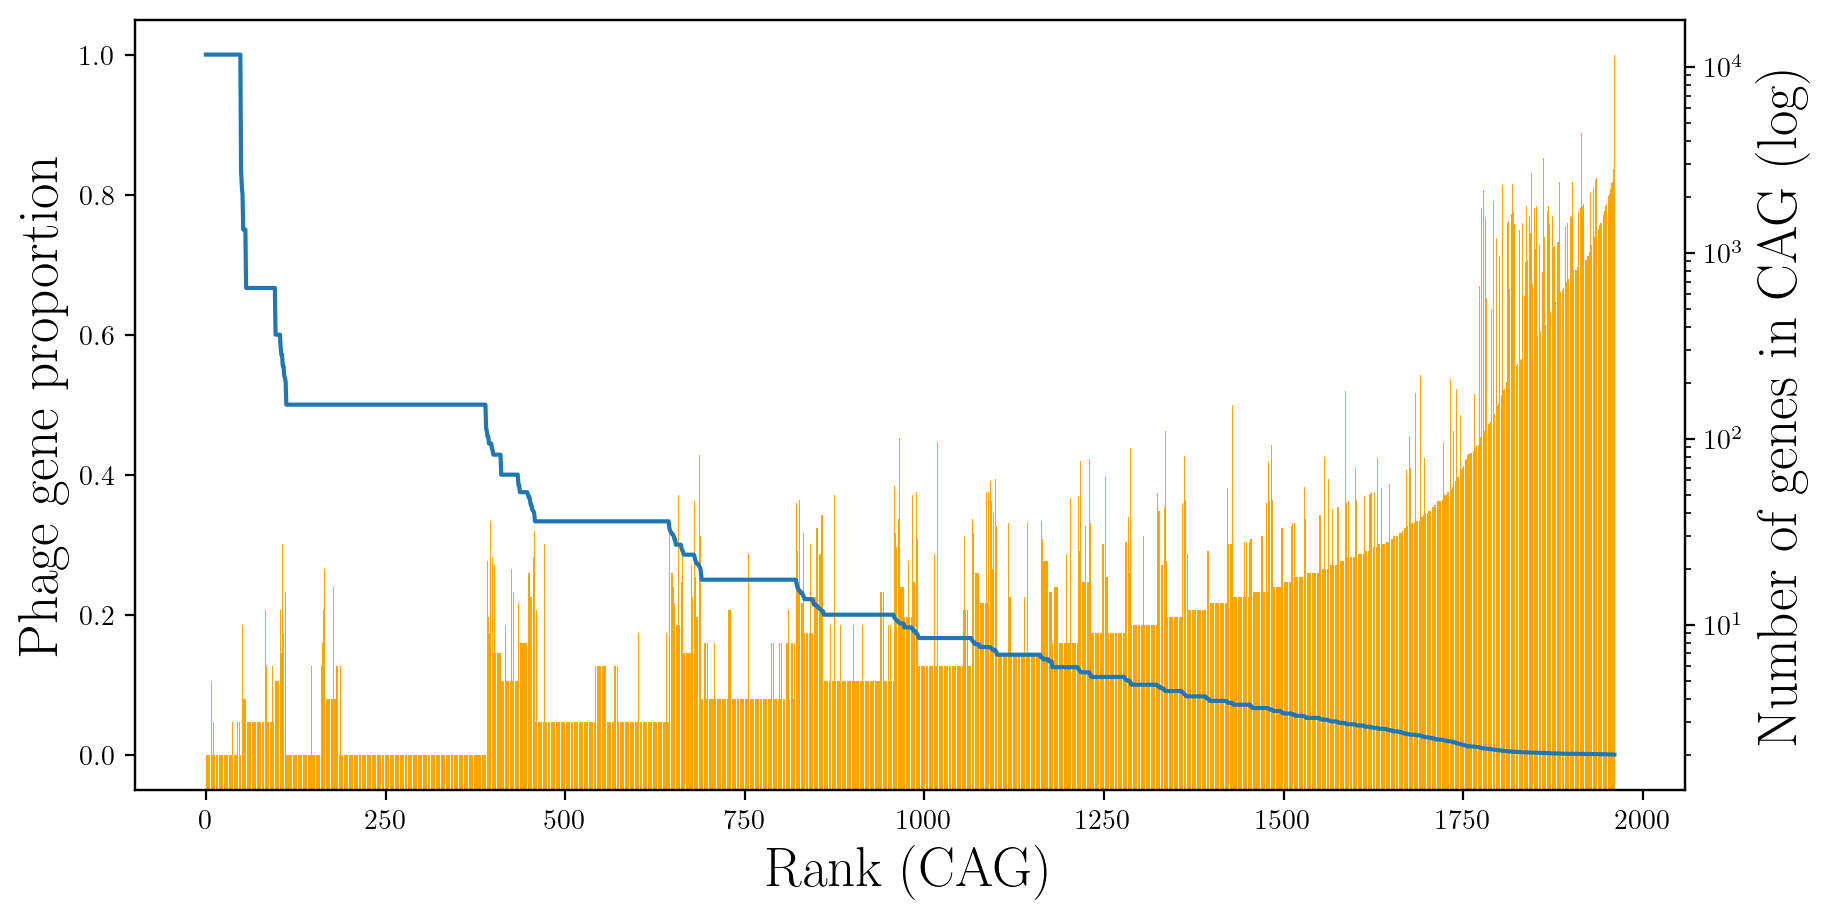

In [199]:
plt.figure(figsize=(10, 5), dpi=200)
ax = plt.gca()
ax2 = plt.twinx()

bar = ax.bar(range(potential_phages.shape[0]), counts.loc[potential_phages].values.flatten(), color="orange")
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.set_yscale("log")
ax.set_ylabel("Number of genes in CAG (log)", fontsize=20)

ax2.plot(phage_gene_proportions.loc[potential_phages].values.flatten())
ax.set_xlabel("Rank (CAG)", fontsize=20)
ax2.yaxis.tick_left()
ax2.yaxis.set_label_position("left")
ax2.set_ylabel("Phage gene proportion", fontsize=20)

In [183]:
crispr = pd.read_csv(os.path.join(config.RAW_DIR, "crispr.txt"), header=None)

In [184]:
crispr_genes_in_CAGs = set(crispr.iloc[:, 0]) & set(clusters.iloc[:, 0])
len(crispr_genes_in_CAGs)

420

In [185]:
is_crispr_gene = clusters.iloc[:, 0].apply(lambda x : x in crispr_genes_in_CAGs)
is_crispr_gene

0
CAG00001    False
CAG00001    False
CAG00001    False
CAG00001    False
CAG00001    False
            ...  
CAG27816    False
CAG27817    False
CAG27817    False
CAG27818    False
CAG27818    False
Name: 1, Length: 543834, dtype: bool

In [186]:
clusters["is_crispr_gene"] = is_crispr_gene

In [187]:
clusters["is_crispr_gene"].sum()

439

In [188]:
crispr_gene_distribution = clusters.groupby(level=0).sum("is_crispr_gene")[["is_crispr_gene"]]
crispr_gene_distribution

,is_crispr_gene
0,
CAG00001,0
CAG00002,0
CAG00003,0
CAG00004,0
CAG00005,0
...,...
CAG27814,0
CAG27815,0
CAG27816,0


In [189]:
crispr_gene_proportions = np.divide(crispr_gene_distribution, counts)

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_17745/2248636647.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  crispr_gene_proportions = np.divide(crispr_gene_distribution, counts)


In [190]:
potential_crispr = crispr_gene_proportions[crispr_gene_proportions.iloc[:, 0] > 0].sort_values("is_crispr_gene", ascending=False).index
potential_crispr

Index(['CAG12491', 'CAG07268', 'CAG16605', 'CAG14141', 'CAG13829', 'CAG20189',
       'CAG09937', 'CAG23141', 'CAG07530', 'CAG21457',
       ...
       'CAG00038', 'CAG00034', 'CAG00028', 'CAG00023', 'CAG00017', 'CAG00016',
       'CAG00015', 'CAG00013', 'CAG00011', 'CAG00008'],
      dtype='object', name=0, length=223)

In [99]:
crispr_gene_proportions.loc[potential_crispr]

,is_crispr_gene
0,
CAG12491,1.000000
CAG07268,1.000000
CAG16605,1.000000
CAG14141,1.000000
CAG13829,1.000000
...,...
CAG00016,0.000396
CAG00015,0.000391
CAG00013,0.000370


In [350]:
df = crispr_gene_proportions.loc[potential_crispr]
df["in_graph"] = df.index
df["in_graph"] = df["in_graph"].apply(lambda x : x in G)
df.head(40)

,is_crispr_gene,in_graph
0,,
CAG12491,1.000000,False
CAG07268,1.000000,False
CAG16605,1.000000,False
CAG14141,1.000000,False
CAG13829,1.000000,False
CAG20189,1.000000,False
CAG09937,1.000000,False
CAG23141,1.000000,False
CAG07530,1.000000,False


In [353]:
np.nanmin(corr[14985])

-0.09540624423666197

Text(0, 0.5, 'CRISPR gene proportion')

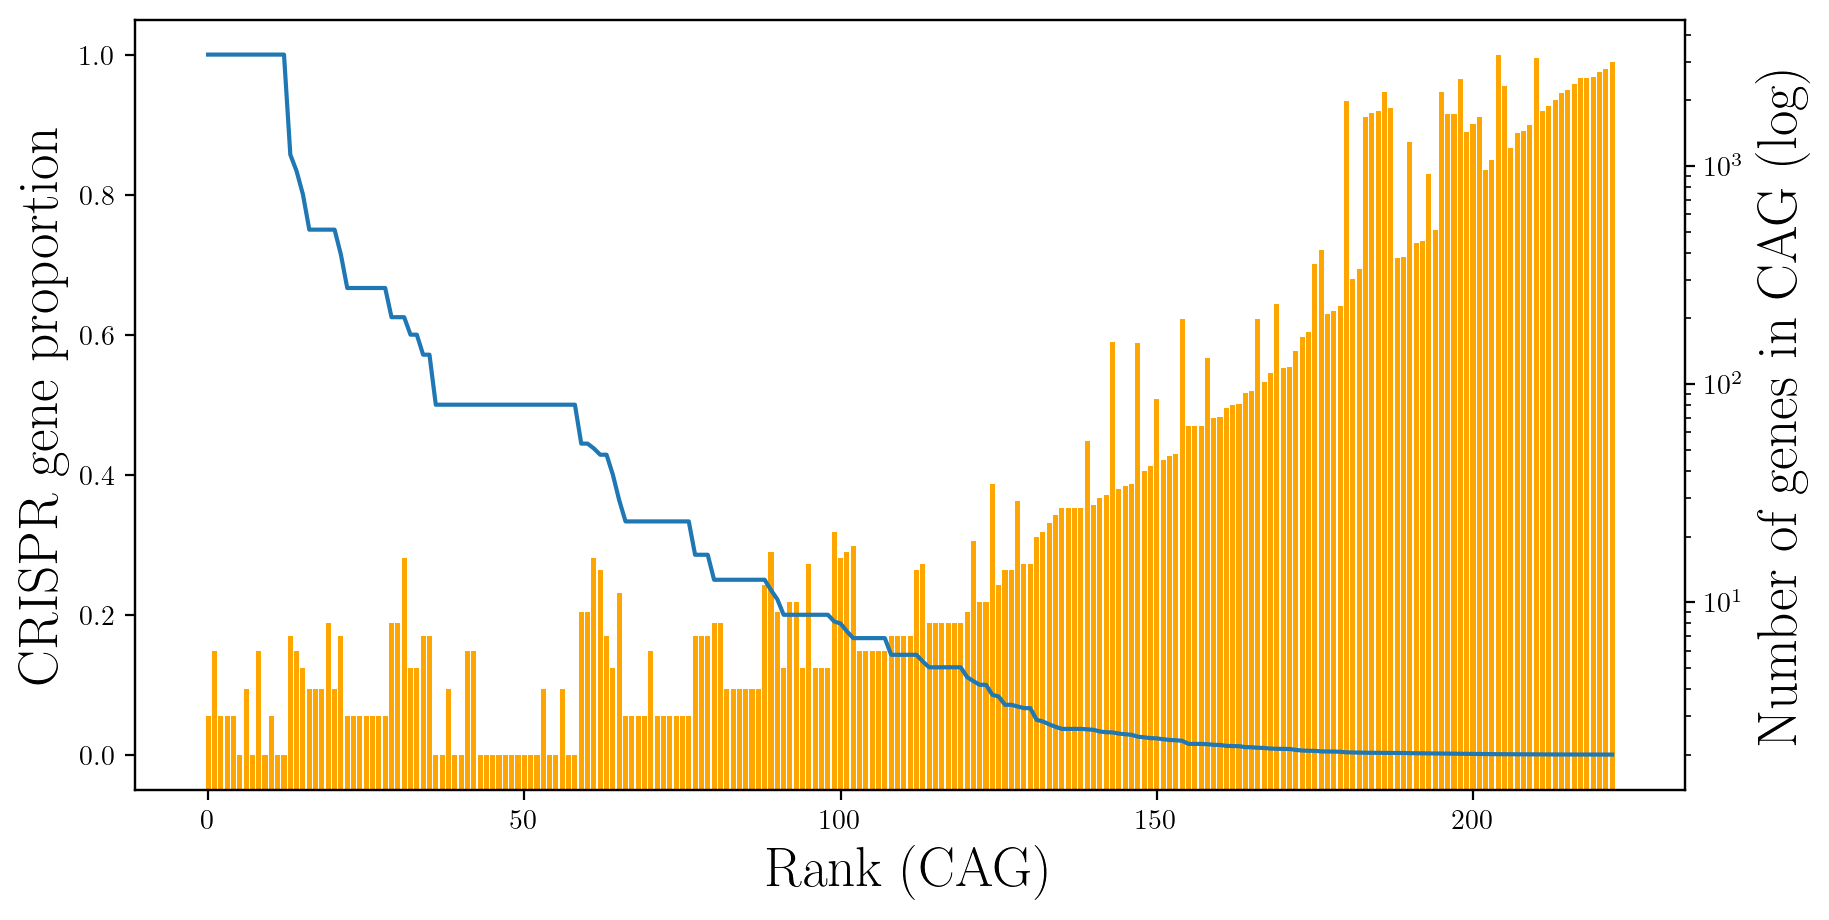

In [320]:
plt.figure(figsize=(10, 5), dpi=200)
ax = plt.gca()
ax2 = plt.twinx()

bar = ax.bar(range(potential_crispr.shape[0]), counts.loc[potential_crispr].values.flatten(), color="orange")
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.set_yscale("log")
ax.set_ylabel("Number of genes in CAG (log)", fontsize=20)

ax2.plot(crispr_gene_proportions.loc[potential_crispr].values.flatten())
ax.set_xlabel("Rank (CAG)", fontsize=20)
ax2.yaxis.tick_left()
ax2.yaxis.set_label_position("left")
ax2.set_ylabel("CRISPR gene proportion", fontsize=20)


In [175]:
sorted(ant_info, key=lambda x : x["coef"])

[{'p': 'CAG08815', 'c': 'CAG05750', 'coef': -0.2351043354373158},
 {'p': 'CAG00243', 'c': 'CAG05750', 'coef': -0.23226014328017494},
 {'p': 'CAG00278', 'c': 'CAG05750', 'coef': -0.2232497869750756},
 {'p': 'CAG05933', 'c': 'CAG05750', 'coef': -0.22229084813105363},
 {'p': 'CAG10549', 'c': 'CAG05750', 'coef': -0.21006275248797884},
 {'p': 'CAG07009', 'c': 'CAG05750', 'coef': -0.20374379421663297},
 {'p': 'CAG16205', 'c': 'CAG05750', 'coef': -0.202994490423793},
 {'p': 'CAG01784', 'c': 'CAG05750', 'coef': -0.20059703450924052},
 {'p': 'CAG22054', 'c': 'CAG05750', 'coef': -0.19580244458184418},
 {'p': 'CAG16187', 'c': 'CAG05750', 'coef': -0.19537700203335323},
 {'p': 'CAG12891', 'c': 'CAG05750', 'coef': -0.19413604771803386},
 {'p': 'CAG08815', 'c': 'CAG10067', 'coef': -0.19412937017522083},
 {'p': 'CAG05282', 'c': 'CAG05750', 'coef': -0.19316365261011034},
 {'p': 'CAG05933', 'c': 'CAG06056', 'coef': -0.19308164096111274},
 {'p': 'CAG09642', 'c': 'CAG05750', 'coef': -0.19261097606125552},

In [192]:
s = set(G.nodes())

In [198]:
G.out_edges("CAG08815")

OutEdgeDataView([('CAG08815', 'CAG00278')])

In [199]:
G.out_edges("CAG00243")

OutEdgeDataView([('CAG00243', 'CAG00278')])

In [220]:
ass_dict = []
CAG2 = "CAG05750"    
    
for CAG1 in all_cags:
    if CAG1 == CAG2: continue

    has_CAG1 = has_CAG[CAG1]
    has_CAG2 = has_CAG[CAG2]

    tr = (~has_CAG1 & has_CAG2).sum()
    prop = tr / has_CAG2.sum()
#     if prop > 0.01: continue

    table = (
        [[(has_CAG1 & has_CAG2).sum(), tr],
         [(has_CAG1 & ~has_CAG2).sum(), (~has_CAG1 & ~has_CAG2).sum()]
        ]
    )

    p = fisher_exact(table, "greater").pvalue
    ass_dict.append({"host" : CAG1, "dependent" : CAG2, "p" : p, "prop" : prop})


In [221]:
sorted(ass_dict, key = lambda x : x["p"])

[{'host': 'CAG00281',
  'dependent': 'CAG05750',
  'p': 2.904295633264052e-304,
  'prop': 0.06756756756756757},
 {'host': 'CAG26324',
  'dependent': 'CAG05750',
  'p': 4.669946363956584e-267,
  'prop': 0.02364864864864865},
 {'host': 'CAG00098',
  'dependent': 'CAG05750',
  'p': 4.268345059498319e-265,
  'prop': 0.037162162162162164},
 {'host': 'CAG02861',
  'dependent': 'CAG05750',
  'p': 5.281266193811446e-264,
  'prop': 0.16216216216216217},
 {'host': 'CAG23793',
  'dependent': 'CAG05750',
  'p': 8.565133633660103e-252,
  'prop': 0.14527027027027026},
 {'host': 'CAG15270',
  'dependent': 'CAG05750',
  'p': 3.514220458065619e-250,
  'prop': 0.11486486486486487},
 {'host': 'CAG20357',
  'dependent': 'CAG05750',
  'p': 9.823935960448003e-247,
  'prop': 0.13175675675675674},
 {'host': 'CAG06853',
  'dependent': 'CAG05750',
  'p': 2.609017521814244e-237,
  'prop': 0.21283783783783783},
 {'host': 'CAG08533',
  'dependent': 'CAG05750',
  'p': 7.761200391661099e-225,
  'prop': 0.23986486486

In [ ]:
G.out

In [178]:
potential_crispr.loc["CAG05750"]

is_crispr_gene    0.75
Name: CAG05750, dtype: float64

In [135]:
s = set(G.nodes())

for c in potential_crispr.index:
    if c in s:
        print(potential_crispr.loc[c])

is_crispr_gene    0.000357
Name: CAG00011, dtype: float64
is_crispr_gene    0.000391
Name: CAG00015, dtype: float64
is_crispr_gene    0.00042
Name: CAG00023, dtype: float64
is_crispr_gene    0.000863
Name: CAG00026, dtype: float64
is_crispr_gene    0.000447
Name: CAG00028, dtype: float64
is_crispr_gene    0.000464
Name: CAG00034, dtype: float64
is_crispr_gene    0.000498
Name: CAG00038, dtype: float64
is_crispr_gene    0.002697
Name: CAG00047, dtype: float64
is_crispr_gene    0.000557
Name: CAG00055, dtype: float64
is_crispr_gene    0.001729
Name: CAG00067, dtype: float64
is_crispr_gene    0.002336
Name: CAG00115, dtype: float64
is_crispr_gene    0.002186
Name: CAG00154, dtype: float64
is_crispr_gene    0.001957
Name: CAG00218, dtype: float64
is_crispr_gene    0.002247
Name: CAG00228, dtype: float64
is_crispr_gene    0.006098
Name: CAG00348, dtype: float64
is_crispr_gene    0.032051
Name: CAG00354, dtype: float64
is_crispr_gene    0.008333
Name: CAG00405, dtype: float64
is_crispr_gene 